In [1]:
import qcodes as qc
import broadbean as bb
import logging
import os
import tempfile
from sequence_builder import SequenceBuilder
from broadbean.plotting import plotter
from alazar_config import alazarconfig
from alazar_config import alazarconfigttwo
import numpy as np
import matplotlib.pyplot as plt
from qcodes.station import Station
from qcodes.utils.dataset.doNd import do0d, do1d
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
from qcodes.dataset.plotting import plot_by_id


logging.basicConfig(level=logging.INFO)

In [2]:
db_path = os.path.join(tempfile.gettempdir(),
                       'data_access_example.db')
initialise_or_create_database_at(db_path)

experiment = load_or_create_experiment(
    experiment_name='alazar',
    sample_name='alazar-sample')

In [3]:
SC = qc.Station(config_file='Config.yaml')
AWGB = SC.load_instrument('awg5208')
seqbuild = SequenceBuilder(name = 'seqbuild', awg=AWGB)
SC.add_component(seqbuild)
alazar = SC.load_instrument('alazar')
#alazarconfigttwo(alazar)
alazarconfig(alazar)
alazar_ctrl = SC.load_instrument('alazar_ctrl')
channelA = SC.load_instrument('channelA',parent=alazar_ctrl)
rec_f1_mag = SC.load_instrument('rec_f1_mag',parent=alazar_ctrl)
rec_f1_phase = SC.load_instrument('rec_f1_phase',parent=alazar_ctrl)
cavity = SC.load_instrument('rs_cavity')  
localos = SC.load_instrument('rs_localos')
qubit = SC.load_instrument('rs_qubit')
switch = SC.load_instrument('minicircuits_switch')  

c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\station.py:359: ValidationWarning: Additional properties are not allowed ('auto_reconnect_instrument' was unexpected)

Failed validating 'additionalProperties' in schema['properties']['instruments']['patternProperties']['^\\w+$']:
    {'additionalProperties': False,
     'properties': {'add_parameters': {'additionalProperties': False,
                                       'patternProperties': {'^(\\w+)(\\.\\w+)*$': {'additionalProperties': False,
                                                                                    'properties': {'initial_value': {},
                                                                                                   'inter_delay': {'type': 'number'},
                                                                                                   'label': {'type': 'string'},
                                                                                                   'l

Connected to: TEKTRONIX AWG5208 (serial:B020204, firmware:FV:6.1.0061.0) in 0.11s


c:\users\t2_2\miniconda3\envs\broadbean\lib\site-packages\qcodes\station.py:359: ValidationWarning: Additional properties are not allowed ('auto_reconnect_instrument' was unexpected)

Failed validating 'additionalProperties' in schema['properties']['instruments']['patternProperties']['^\\w+$']:
    {'additionalProperties': False,
     'properties': {'add_parameters': {'additionalProperties': False,
                                       'patternProperties': {'^(\\w+)(\\.\\w+)*$': {'additionalProperties': False,
                                                                                    'properties': {'initial_value': {},
                                                                                                   'inter_delay': {'type': 'number'},
                                                                                                   'label': {'type': 'string'},
                                                                                                   'l

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103079, firmware:3.1.19.7-3.20.140.60.1) in 0.03s


INFO:qcodes.instrument.base.com.visa:[rs_localos(RohdeSchwarz_SGS100A)] Opening PyVISA Resource Manager with default backend.
INFO:qcodes.instrument.base.com.visa:[rs_localos(RohdeSchwarz_SGS100A)] Opening PyVISA resource at address: TCPIP0::192.168.15.108::inst0::INSTR
INFO:qcodes.instrument.base:[rs_localos(RohdeSchwarz_SGS100A)] Connected to instrument: {'vendor': 'Rohde&Schwarz', 'model': 'SGS100A', 'serial': '1416.0505k02/103848', 'firmware': '3.1.19.15-3.20.347.26'}


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103848, firmware:3.1.19.15-3.20.347.26) in 0.03s


INFO:qcodes.instrument.base.com.visa:[rs_qubit(RohdeSchwarz_SGS100A)] Opening PyVISA Resource Manager with default backend.
INFO:qcodes.instrument.base.com.visa:[rs_qubit(RohdeSchwarz_SGS100A)] Opening PyVISA resource at address: TCPIP0::192.168.15.107::inst0::INSTR
INFO:qcodes.instrument.base:[rs_qubit(RohdeSchwarz_SGS100A)] Connected to instrument: {'vendor': 'Rohde&Schwarz', 'model': 'SGS100A', 'serial': '1416.0505k02/103078', 'firmware': '3.1.19.7-3.20.140.60.1'}


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103078, firmware:3.1.19.7-3.20.140.60.1) in 0.03s


INFO:qcodes.instrument.base:[minicircuits_switch(USB_SPDT)] Connected to instrument: {'vendor': 'Mini-Circuits', 'model': 'USB-4SPDT-A18', 'serial': '11608300052', 'firmware': 20}


Connected to: Mini-Circuits USB-4SPDT-A18 (serial:11608300052, firmware:20) in 0.05s


In [4]:
SC.seqbuild.readout_freq_1(6609095000)
print(SC.seqbuild.readout_freq_1())

6609095000


In [5]:
SC.seqbuild.cycle_time = 6e-6
SC.seqbuild.pulse_time = 0.6e-6
SC.seqbuild.readout_time = 2.5e-6
SC.seqbuild.marker_offset = 0e-9
SC.seqbuild.SR.set(2.5e9)


In [6]:
npts = 121
span=400e6/2
qubit_frequency = 3.3e9
start = qubit_frequency -span
stop = qubit_frequency + span
SC.seqbuild.MultiQ_SSB_Spec_NoOverlap(start, stop, npts)

In [7]:
#SC.seqbuild.seq.plot()

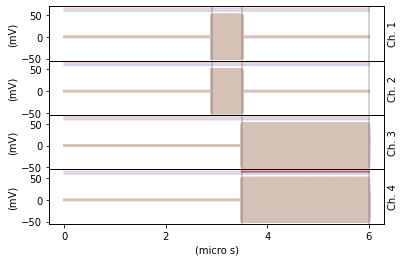

In [8]:
SC.seqbuild.seq.plot_elem_nr(100)

In [9]:
SC.seqbuild.uploadToAWG()

Sequence uploaded in 9.269089698791504 seconds


In [10]:
SC.seqbuild.runAWG()

In [11]:
SC.seqbuild.awg.run_state()

'Running'

In [12]:
print(SC.seqbuild.awg.ch1.state())
print(SC.seqbuild.awg.ch2.state())
print(SC.seqbuild.awg.ch3.state())
print(SC.seqbuild.awg.ch4.state())

1
1
1
1


In [13]:

print(switch.a())
print(switch.b())

2
2


In [14]:
#prepare switches and instruments

switch.a(2)
switch.b(2)

#Turn Rohde and Schwarz boxes on and allow IQ modulation
cavity.status(1)  
cavity.IQ_state(1)
qubit.status(1)
qubit.IQ_state(1)


# set cavity and qubit power manually
USE_READOUT_FREQ = 6609095000
USE_DEMOD_FREQ = 20e6
USE_READOUT_POWER = -15
cavity.power(USE_READOUT_POWER)
qubit.power(-40)

cavity.frequency(USE_READOUT_FREQ - USE_DEMOD_FREQ) 


In [15]:
alazar_ctrl.channels.append(rec_f1_mag)
alazar_ctrl.channels.append(rec_f1_phase)
alazar_ctrl.channels[0].demod_freq(USE_DEMOD_FREQ)
alazar_ctrl.channels[1].demod_freq(USE_DEMOD_FREQ)
for n, ala_chan in enumerate(alazar_ctrl.channels[0:2]):
    ala_chan.records_per_buffer(npts)
    ala_chan.data.setpoint_labels = ('SSB Drive frequency (Non-overlap)',)
    ala_chan.data.setpoint_units = ('Hz',)
alazar_ctrl.int_delay(2e-7)
alazar_ctrl.int_time(0.5e-6)

INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 200.0 samples round up to 256
INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 700.0 samples round up to 768


In [16]:
alazar.aux_io_mode()

'AUX_IN_AUXILIARY'

In [17]:
rec_f1_phase.records_per_buffer(npts)
rec_f1_phase.num_averages(80)

rec_f1_phase.prepare_channel()

# Measure this 
#data1 = do0d(channelA.data)
#SC.seqbuild.runAWG()
#plot_by_id(data1[0].run_id)

In [18]:
alazar.IDN()

{'firmware': '21.09',
 'model': 'ATS9360',
 'max_samples': 4294967294,
 'bits_per_sample': 12,
 'serial': '970344',
 'vendor': 'AlazarTech',
 'CPLD_version': '25.16',
 'driver_version': '6.5.1',
 'SDK_version': '6.5.1',
 'latest_cal_date': '13-11-15',
 'memory_size': '4294967294',
 'asopc_type': 1763017568,
 'pcie_link_speed': '0.5GB/s',
 'pcie_link_width': '8'}

In [19]:
rec_f1_phase.data.get()

INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 768, 'records_per_buffer': 121, 'buffers_per_acquisition': 80, 'allocated_buffers': 4}


array([ 5.83314785e-04, -2.33946682e-03, -1.46962057e-03,  8.05431869e-04,
       -3.24801729e-03,  1.80551281e-03, -2.26515156e-03, -2.11477198e-03,
        1.03386522e-03, -1.88977104e-03,  5.19794025e-03,  2.38219265e-03,
        5.46947048e-04, -1.48654592e-06,  1.37829158e-03, -1.36172453e-04,
        2.05883376e-03, -7.17013522e-04,  3.43686862e-04, -1.97182938e-03,
       -1.14067044e-03, -5.57795385e-04, -1.80468271e-03,  1.85319804e-03,
        5.40359049e-04, -1.64982781e-03,  3.11980014e-03, -2.29770636e-03,
       -2.49528698e-03, -7.97782470e-04,  3.66802215e-04, -9.13724311e-04,
        3.63810085e-04,  4.33827154e-05,  1.25869992e-03,  1.01404675e-03,
       -2.39375180e-03,  1.06653458e-04,  1.72054532e-03, -3.71582874e-04,
        3.79733569e-03, -9.48366279e-04, -1.45815791e-03,  4.75570561e-04,
        1.60934553e-03, -2.75451373e-05,  4.46406907e-03, -2.35019768e-03,
       -1.24072515e-03,  5.07086599e-03,  2.71116573e-03, -1.72657248e-04,
        2.80698258e-03,  

In [26]:
data1 = do0d(rec_f1_phase.data)

INFO:qcodes.dataset.measurements:Registered alazar_ctrl_rec_f1_phase_records in the Measurement.
INFO:qcodes.dataset.measurements:Registered alazar_ctrl_rec_f1_phase_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 14 to 1614696317.122237
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0177f366805f. 
INFO:qcodes.dataset.measurements:Using background writing: False


Starting experimental run with id: 14. 


ModuleNotFoundError: No module named 'qcplotutils'

In [23]:
qc.config

Current values: 
 {'core': {'default_fmt': 'data/{date}/#{counter}_{name}_{time}', 'register_magic': True, 'import_legacy_api': False, 'db_location': 'C:\\Users\\T2_2\\AppData\\Local\\Temp\\data_access_example.db', 'db_debug': False, 'loglevel': 'WARNING', 'file_loglevel': 'INFO'}, 'logger': {'start_logging_on_import': 'if_telemetry_set_up', 'console_level': 'WARNING', 'file_level': 'INFO', 'logger_levels': {'pyvisa': 'INFO'}}, 'subscription': {'subscribers': {'QCPlot': {'factory': 'qcplotutils.qcodes_dataset.QCPlotDatasetSubscriber', 'factory_kwargs': {'log': False}, 'subscription_kwargs': {'min_wait': 0, 'min_count': 1, 'callback_kwargs': {}}}, 'Plottr': {'factory': 'plottr.qcodes_dataset.QcodesDatasetSubscriber', 'factory_kwargs': {'log': False}, 'subscription_kwargs': {'min_wait': 0, 'min_count': 1, 'callback_kwargs': {}}}}, 'default_subscribers': ['QCPlot']}, 'gui': {'notebook': True, 'plotlib': None, 'pyqtmaxplots': 100, 'defaultcolormap': 'hot'}, 'plotting': {'default_color_map'

In [ ]:

alazar_ctrl.int_delay(0e-6)
alazar_ctrl.int_time(SC.seqbuild.pulse_time)
alazar_ctrl.channels.append(channelA_phase)
alazar_ctrl.channels.append(channelA_magnitude)
alazar_ctrl.channels.append(channelA_real)
alazar_ctrl.channels.append(channelA_imag)




In [ ]:
channelA_phase.records_per_buffer(npts)
channelA_phase.num_averages(8000)

channelA_phase.prepare_channel()
# Measure this 
data1 = do0d(channelA_phase.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
channelA_magnitude.records_per_buffer(npts)
channelA_magnitude.num_averages(8000)

channelA_magnitude.prepare_channel()
# Measure this 
data1 = do0d(channelA_magnitude.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
channelA_magnitude.data.get()

In [ ]:
from qcodes.dataset.data_set import load_by_id
data = load_by_id(102)

In [ ]:
dis = data.snapshot['station']['instruments']['seqbuild']['parameters']['seq']
snapseq = bb.Sequence().sequence_from_description(dis)
plotter(snapseq.element(50))

In [ ]:
dis

In [ ]:
channelA2.records_per_buffer(npts)
channelA2.num_averages(80)

channelA2.prepare_channel()
# Measure this 
data1 = do0d(channelA2.data)
#SC.seqbuild.runAWG()
plot_by_id(data1[0].run_id)

In [ ]:
stop = True

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
#fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
#ax.axis('equal')
#ax.set_aspect('equal', 'box')
stop = False
for i in range(100):
    if stop:
        break
    bla = channelA2.data.get()
    ax.clear()
    ax.imshow(bla)
    ax.set_aspect(aspect='auto')
    fig.canvas.draw()

In [ ]:
alazar.snapshot()